In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

print("Setup Complete")

Setup Complete


In [7]:
!pip install h5py

In [8]:
from numpy import loadtxt
from tensorflow.keras.models import load_model

leNetFilepath = '../input/lenet-pretrained-model/lenet.h5'

In [9]:
# load model
leNet = load_model(leNetFilepath)
# summarize model.
leNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [13]:
# declaring optimizer arguments
beta1 = 0.9
beta2 = 0.99
epsilonE = 1e-06

# declaring optimizers
# AdaGrad
adagrad1 = tf.keras.optimizers.Adagrad(
    learning_rate = 0.001,
    initial_accumulator_value = 0.1,
    epsilon = epsilonE,
)

# Adam
adam1 = tf.keras.optimizers.Adam(
    learning_rate = 0.001,
    beta_1 = beta1,
    beta_2 = beta2,
    epsilon = epsilonE,
    amsgrad=False,
 
)

# RMSProp
rmsprop1 = tf.keras.optimizers.RMSprop(
    learning_rate = 0.001,
    rho = 0.9,
    momentum = 0.0,
    epsilon = epsilonE,
    centered=False,
)

# Momentum
momentum1 = tf.keras.optimizers.SGD(
    learning_rate = 0.01,
    momentum = beta1,
    nesterov = False,
)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

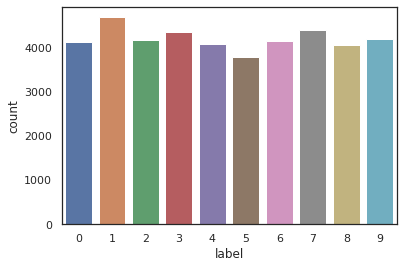

In [14]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")
# Create separate copy of training labels
y_train = train['label']

# Drop the label columns from the training data
X_train = train.drop(['label'], axis = 1)

del train 

g = sns.countplot(y_train)

y_train.value_counts()

In [15]:
X_train = X_train / 255.0
test = test / 255.0

In [16]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [17]:
y_train = to_categorical(y_train, num_classes = 10)
print(y_train.shape)


(42000, 10)


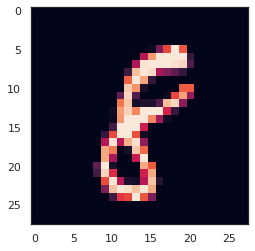

In [18]:
random_seed = 42
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = random_seed)
g = plt.imshow(X_train[0][:,:,0])

In [19]:
epochs = 30
batch_size = 86

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [20]:
# Momentum
leNetMomentum = leNet
leNetMomentum.compile(optimizer = momentum1, loss = "categorical_crossentropy", metrics=["accuracy"])
history = leNetMomentum.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, verbose = 2, 
                            steps_per_epoch=X_train.shape[0] // batch_size)


2022-10-17 15:20:34.395425: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-10-17 15:20:35.702137: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


439/439 - 15s - loss: 0.4561 - accuracy: 0.8812
Epoch 2/30
439/439 - 9s - loss: 0.1470 - accuracy: 0.9545
Epoch 3/30
439/439 - 8s - loss: 0.1119 - accuracy: 0.9642
Epoch 4/30
439/439 - 9s - loss: 0.0970 - accuracy: 0.9701
Epoch 5/30
439/439 - 9s - loss: 0.0841 - accuracy: 0.9738
Epoch 6/30
439/439 - 9s - loss: 0.0754 - accuracy: 0.9765
Epoch 7/30
439/439 - 8s - loss: 0.0670 - accuracy: 0.9794
Epoch 8/30
439/439 - 8s - loss: 0.0644 - accuracy: 0.9797
Epoch 9/30
439/439 - 9s - loss: 0.0617 - accuracy: 0.9802
Epoch 10/30
439/439 - 8s - loss: 0.0570 - accuracy: 0.9837
Epoch 11/30
439/439 - 8s - loss: 0.0547 - accuracy: 0.9831
Epoch 12/30
439/439 - 9s - loss: 0.0535 - accuracy: 0.9839
Epoch 13/30
439/439 - 9s - loss: 0.0466 - accuracy: 0.9854
Epoch 14/30
439/439 - 8s - loss: 0.0498 - accuracy: 0.9847
Epoch 15/30
439/439 - 8s - loss: 0.0468 - accuracy: 0.9856
Epoch 16/30
439/439 - 8s - loss: 0.0459 - accuracy: 0.9849
Epoch 17/30
439/439 - 8s - loss: 0.0409 - accuracy: 0.9874
Epoch 18/30
439/

In [21]:
leNetMomentum.evaluate(X_val, y_val)

132/132 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9926


[0.025894872844219208, 0.9926190376281738]

In [26]:
# Adagrad
leNetAdagrad = leNet
leNetAdagrad.compile(optimizer = adagrad1, loss = "categorical_crossentropy", metrics=["accuracy"])
history = leNetAdagrad.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, verbose = 2, 
                            steps_per_epoch=X_train.shape[0] // batch_size)
leNetAdagrad.evaluate(X_val, y_val)

Epoch 1/30
439/439 - 10s - loss: 0.0111 - accuracy: 0.9963
Epoch 2/30
439/439 - 8s - loss: 0.0102 - accuracy: 0.9961
Epoch 3/30
439/439 - 8s - loss: 0.0094 - accuracy: 0.9970
Epoch 4/30
439/439 - 8s - loss: 0.0092 - accuracy: 0.9971
Epoch 5/30
439/439 - 9s - loss: 0.0090 - accuracy: 0.9967
Epoch 6/30
439/439 - 8s - loss: 0.0084 - accuracy: 0.9975
Epoch 7/30
439/439 - 8s - loss: 0.0083 - accuracy: 0.9972
Epoch 8/30
439/439 - 8s - loss: 0.0089 - accuracy: 0.9971
Epoch 9/30
439/439 - 8s - loss: 0.0081 - accuracy: 0.9970
Epoch 10/30
439/439 - 8s - loss: 0.0076 - accuracy: 0.9977
Epoch 11/30
439/439 - 9s - loss: 0.0085 - accuracy: 0.9971
Epoch 12/30
439/439 - 8s - loss: 0.0079 - accuracy: 0.9972
Epoch 13/30
439/439 - 8s - loss: 0.0095 - accuracy: 0.9973
Epoch 14/30
439/439 - 8s - loss: 0.0079 - accuracy: 0.9973
Epoch 15/30
439/439 - 9s - loss: 0.0081 - accuracy: 0.9977
Epoch 16/30
439/439 - 8s - loss: 0.0091 - accuracy: 0.9971
Epoch 17/30
439/439 - 8s - loss: 0.0083 - accuracy: 0.9972
Epoch

[0.023975802585482597, 0.993571400642395]

In [27]:
# RMSProp
leNetRMSProp = leNet
leNetRMSProp.compile(optimizer = rmsprop1, loss = "categorical_crossentropy", metrics=["accuracy"])
history = leNetRMSProp.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, verbose = 2, 
                            steps_per_epoch=X_train.shape[0] // batch_size)
leNetRMSProp.evaluate(X_val, y_val)

Epoch 1/30
439/439 - 10s - loss: 0.0199 - accuracy: 0.9935
Epoch 2/30
439/439 - 9s - loss: 0.0216 - accuracy: 0.9931
Epoch 3/30
439/439 - 9s - loss: 0.0226 - accuracy: 0.9924
Epoch 4/30
439/439 - 9s - loss: 0.0204 - accuracy: 0.9938
Epoch 5/30
439/439 - 8s - loss: 0.0226 - accuracy: 0.9929
Epoch 6/30
439/439 - 9s - loss: 0.0222 - accuracy: 0.9930
Epoch 7/30
439/439 - 8s - loss: 0.0225 - accuracy: 0.9933
Epoch 8/30
439/439 - 9s - loss: 0.0213 - accuracy: 0.9932
Epoch 9/30
439/439 - 8s - loss: 0.0233 - accuracy: 0.9926
Epoch 10/30
439/439 - 8s - loss: 0.0238 - accuracy: 0.9930
Epoch 11/30
439/439 - 9s - loss: 0.0252 - accuracy: 0.9927
Epoch 12/30
439/439 - 8s - loss: 0.0238 - accuracy: 0.9932
Epoch 13/30
439/439 - 8s - loss: 0.0241 - accuracy: 0.9934
Epoch 14/30
439/439 - 9s - loss: 0.0241 - accuracy: 0.9928
Epoch 15/30
439/439 - 8s - loss: 0.0227 - accuracy: 0.9936
Epoch 16/30
439/439 - 8s - loss: 0.0231 - accuracy: 0.9935
Epoch 17/30
439/439 - 8s - loss: 0.0226 - accuracy: 0.9934
Epoch

[0.041827138513326645, 0.9926190376281738]

In [28]:
# Adam
leNetAdam = leNet
leNetAdam.compile(optimizer = adam1, loss = "categorical_crossentropy", metrics=["accuracy"])
history = leNetAdam.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, verbose = 2, 
                            steps_per_epoch=X_train.shape[0] // batch_size)
leNetAdam.evaluate(X_val, y_val)

Epoch 1/30
439/439 - 9s - loss: 0.0253 - accuracy: 0.9922
Epoch 2/30
439/439 - 8s - loss: 0.0229 - accuracy: 0.9926
Epoch 3/30
439/439 - 8s - loss: 0.0234 - accuracy: 0.9929
Epoch 4/30
439/439 - 8s - loss: 0.0227 - accuracy: 0.9930
Epoch 5/30
439/439 - 8s - loss: 0.0235 - accuracy: 0.9931
Epoch 6/30
439/439 - 8s - loss: 0.0239 - accuracy: 0.9928
Epoch 7/30
439/439 - 10s - loss: 0.0211 - accuracy: 0.9935
Epoch 8/30
439/439 - 8s - loss: 0.0235 - accuracy: 0.9931
Epoch 9/30
439/439 - 8s - loss: 0.0217 - accuracy: 0.9931
Epoch 10/30
439/439 - 8s - loss: 0.0208 - accuracy: 0.9934
Epoch 11/30
439/439 - 8s - loss: 0.0218 - accuracy: 0.9932
Epoch 12/30
439/439 - 8s - loss: 0.0183 - accuracy: 0.9942
Epoch 13/30
439/439 - 8s - loss: 0.0233 - accuracy: 0.9930
Epoch 14/30
439/439 - 9s - loss: 0.0211 - accuracy: 0.9934
Epoch 15/30
439/439 - 8s - loss: 0.0220 - accuracy: 0.9934
Epoch 16/30
439/439 - 8s - loss: 0.0211 - accuracy: 0.9931
Epoch 17/30
439/439 - 9s - loss: 0.0198 - accuracy: 0.9938
Epoch

[0.037439197301864624, 0.9895238280296326]